In [6]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast

In [30]:
trump_df = pandas.read_csv('data/all_trump_w_topics.csv')
trump_df['candidate'] = 'trump'
clinton_df = pandas.read_csv('data/all_clinton_w_topics.csv')
clinton_df['candidate'] = 'clinton'
sanders_df = pandas.read_csv('data/all_sanders_w_topics.csv')
sanders_df['candidate'] = 'sanders'
cruz_df = pandas.read_csv('data/all_cruz_w_topics.csv')
cruz_df['candidate'] = 'cruz'
ORGS = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']


In [31]:
n = len(clinton_df) 
clinton_df.index = xrange(len(trump_df), (len(trump_df) + n))
m = len(sanders_df)
sanders_df.index = xrange(max(clinton_df.index), max(clinton_df.index) + m)
c = len(cruz_df)
cruz_df.index = xrange(max(sanders_df.index), max(sanders_df.index) + c)

In [32]:
all_df = pandas.concat([trump_df,clinton_df, sanders_df, cruz_df]) 
all_df['gunning_fog'] = all_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
all_df['flesch'] = all_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
all_df['readability'] = all_df['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)

# Convert topics to Dict and Filter by > 0.1

In [34]:
all_df['topic_dict'] = all_df['topic'].apply(lambda d: ast.literal_eval(d))
all_df['top_topics'] = all_df['topic_dict'].apply(lambda d: {k:v for k, v in d.iteritems() if v > 0.1})
all_df['topic_list'] = all_df['top_topics'].apply(lambda d: d.keys()) 
all_df['top_topic'] = all_df['topic_dict'].apply(lambda d: max(d, key=lambda i: d[i]))

# Breakdown of Story Topics

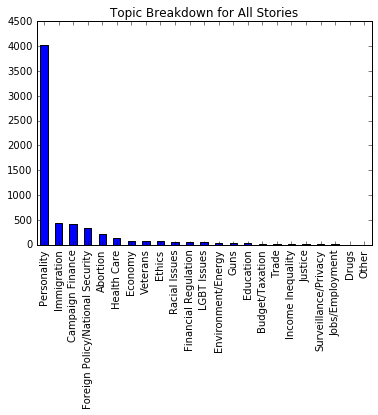

In [35]:
all_df['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for All Stories")
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

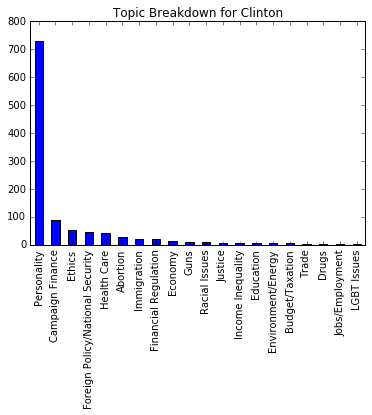

In [41]:
all_df[all_df['candidate'] == 'clinton']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Clinton")

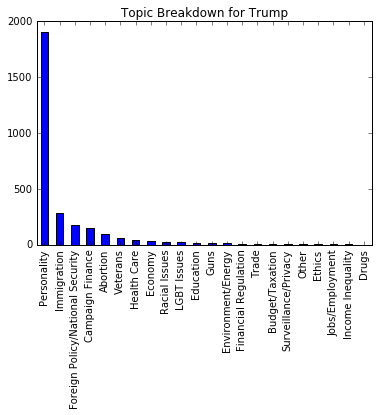

In [42]:
all_df[all_df['candidate'] == 'trump']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Trump")

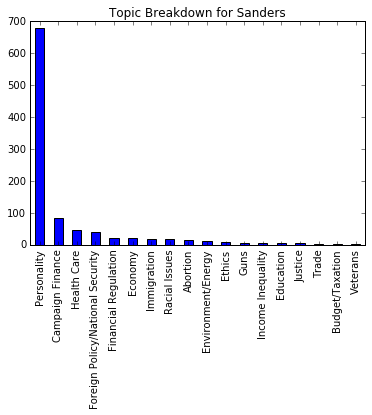

In [43]:
all_df[all_df['candidate'] == 'sanders']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Sanders")

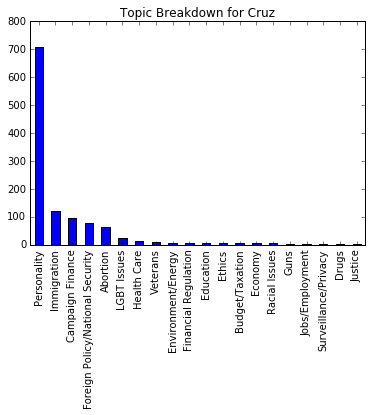

In [64]:
all_df[all_df['candidate'] == 'cruz']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Cruz")

## Reading Level Breakdown by Topic

In [65]:
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

TOPICS = ['Personality', 'Immigration', 'Campaign Finance', 'Foreign Policy/National Security',
         'Abortion', 'Health Care', 'Economy', 'Veterans', 'Ethics', 'Racial Issues']

print "Average Flesch Scores by Topic"
for t in TOPICS:
    df_t = all_df[all_df['top_topic'] == t]
    print t, ":", '%.2f' % df_t['flesch'].mean()

Average Flesch Scores by Topic
Personality : 9.02
Immigration : 9.28
Campaign Finance : 9.01
Foreign Policy/National Security : 9.19
Abortion : 9.08
Health Care : 9.86
Economy : 9.75
Veterans : 9.06
Ethics : 10.90
Racial Issues : 9.93


## Topic Breakdown By Candidate

In [123]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
for c in CANDIDATES:
    print c, 'average Flesch score', '%.2f' % all_df[all_df['candidate'] == c]['flesch'].mean()   
    print "\t\t\t\t\t%"
    print 100* all_df[all_df['candidate'] == c]['top_topic'].value_counts(normalize=True)[:5]
    print

clinton average Flesch score 9.55
					%
Personality                         66.453965
Campaign Finance                     8.204193
Ethics                               4.740201
Foreign Policy/National Security     4.193254
Health Care                          3.828624
Name: top_topic, dtype: float64

sanders average Flesch score 9.55
					%
Personality                         68.442211
Campaign Finance                     8.442211
Health Care                          4.623116
Foreign Policy/National Security     4.020101
Financial Regulation                 2.211055
Name: top_topic, dtype: float64

trump average Flesch score 8.94
					%
Personality                         66.110532
Immigration                          9.871394
Foreign Policy/National Security     6.082725
Campaign Finance                     5.318040
Abortion                             3.441084
Name: top_topic, dtype: float64

cruz average Flesch score 8.85
					%
Personality                         61.154177
Immigr

## Average Reading Scores by Candidate per Topic

In [116]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
for t in TOPICS: 
    scores = []
    for c in CANDIDATES:
        scores.append((c,all_df[(all_df['candidate'] == c) & (all_df['top_topic'] == t)]['flesch'].mean())) 
    scores.sort(key=lambda x: x[1], reverse=True)
    
    print t
    for s in scores:
        print s[0], '%.2f' % s[1]
    print

Personality
sanders 9.35
clinton 9.30
trump 8.87
cruz 8.79

Immigration
sanders 10.19
clinton 10.09
trump 9.31
cruz 8.91

Campaign Finance
sanders 9.40
clinton 9.34
trump 8.79
cruz 8.73

Foreign Policy/National Security
clinton 10.16
sanders 9.77
trump 8.93
cruz 8.89

Abortion
clinton 10.19
sanders 9.45
cruz 8.90
trump 8.81

Health Care
sanders 10.52
clinton 9.85
cruz 9.55
trump 9.16

Economy
clinton 10.42
sanders 9.98
trump 9.48
cruz 8.50

Veterans
clinton nan
trump 9.08
cruz 9.07
sanders 8.30

Ethics
sanders 11.11
trump 11.10
cruz 10.88
clinton 10.86

Racial Issues
sanders 10.99
clinton 10.76
trump 9.20
cruz 8.66



## Story Distrubtion Per Candidate


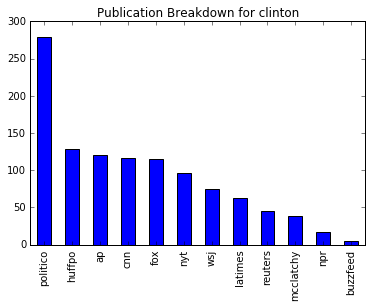

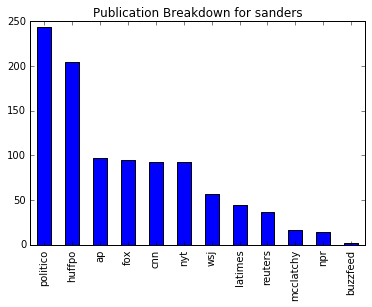

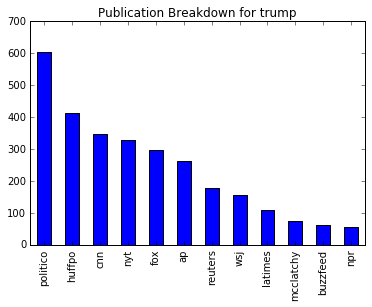

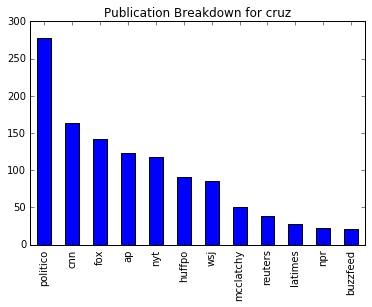

In [111]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
 
for c in CANDIDATES: 
    all_df[all_df['candidate'] == c]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + c)
    matplotlib.pyplot.show() 